In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import BatchNormalization
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.models import load_model
from keras.utils import np_utils
from keras.datasets import mnist
from keras.callbacks import EarlyStopping
import numpy as np

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = np.array(X_train, dtype = np.float32)
X_test = np.array(X_test, dtype = np.float32)
X_train = X_train.reshape(60000, 28,28,1)
X_test = X_test.reshape(10000, 28,28,1)
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [10]:
#Using ConvNets
convmodel = Sequential()
convmodel.add(Conv2D(filters=32, padding = "same", kernel_size = (5,5), activation = "relu", input_shape = (28,28,1)))
convmodel.add(Conv2D(filters=32, padding = "same", kernel_size = (5,5), activation = "relu"))
convmodel.add(MaxPooling2D(pool_size=(2,2)))
convmodel.add(BatchNormalization())
convmodel.add(Conv2D(filters=64, padding = "same", kernel_size = (3,3), activation = "relu"))
convmodel.add(Conv2D(filters=64, padding = "same", kernel_size = (3,3), activation = "relu"))
convmodel.add(MaxPooling2D(pool_size=(2,2)))
convmodel.add(BatchNormalization())
convmodel.add(Flatten())
convmodel.add(Dense(500, activation = "relu"))
convmodel.add(Dense(10, activation = "softmax"))
convmodel.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics=["accuracy"])
convhist = convmodel.fit(X_train, y_train, batch_size=128, epochs=20, verbose = 1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 197us/step - loss: 0.1075 - acc: 0.9683 - val_loss: 0.0414 - val_acc: 0.9863
Epoch 2/20
60000/60000 [==============================] - 11s 183us/step - loss: 0.0346 - acc: 0.9895 - val_loss: 0.0350 - val_acc: 0.9890
Epoch 3/20
60000/60000 [==============================] - 11s 184us/step - loss: 0.0223 - acc: 0.9934 - val_loss: 0.0380 - val_acc: 0.9884
Epoch 4/20
60000/60000 [==============================] - 11s 183us/step - loss: 0.0191 - acc: 0.9938 - val_loss: 0.0342 - val_acc: 0.9903
Epoch 5/20
60000/60000 [==============================] - 11s 184us/step - loss: 0.0151 - acc: 0.9951 - val_loss: 0.0645 - val_acc: 0.9818
Epoch 6/20
60000/60000 [==============================] - 11s 184us/step - loss: 0.0153 - acc: 0.9951 - val_loss: 0.0379 - val_acc: 0.9903
Epoch 7/20
60000/60000 [==============================] - 11s 183us/step - loss: 0.0109 - acc: 0.9962 - val_loss: 0.

In [11]:
score = convmodel.evaluate(X_test, y_test,verbose=0)
score

[0.037449790947711246, 0.9927]

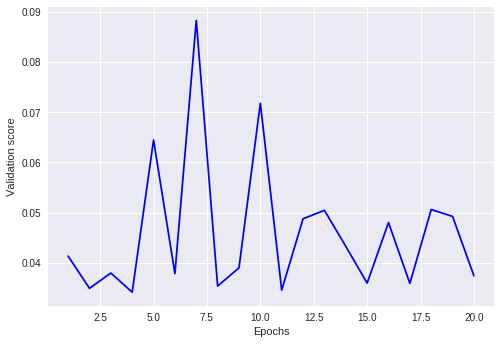

In [12]:
plt.plot(range(1, len(convhist.history["val_loss"])+1), convhist.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

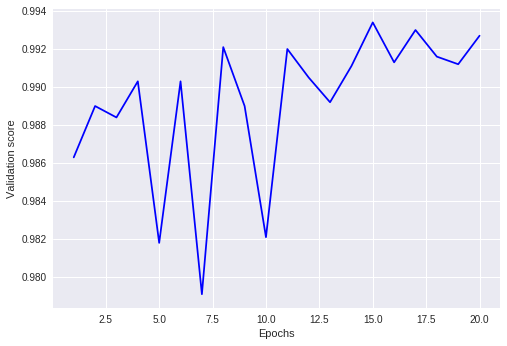

In [13]:
plt.plot(range(1, len(convhist.history["val_acc"])+1), convhist.history['val_acc'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

In [0]:
convmodel.save("ConvModel_1.h5")